In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('seaborn-white')
%matplotlib inline
    
import xgboost as xgb
from sklearn.model_selection import  train_test_split
# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import *
# Helper functions
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from imblearn.over_sampling import ADASYN

import warnings
warnings.filterwarnings("ignore")

%reload_ext autoreload
%autoreload 2
import numpy as np 

In [2]:
import mealpy 

In [3]:
from mealpy.swarm_based.MOD_AO import OriginalAO

In [4]:
from opfunu.cec_basic.cec2014_nobias import *

from sklearn.model_selection import train_test_split

In [5]:
from opfunu.cec_basic.cec2014_nobias import *
from mealpy.evolutionary_based.GA import BaseGA
from mealpy.evolutionary_based.DE import BaseDE

from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('Full_feature_data8sec_15_feature.csv')


In [7]:
X=df.drop(columns=['4608'])

In [8]:
X.loc[0:22000,:]

,0,1,2,3,4,5,6,7,8,9,...,8.14,9.14,10.14,11.14,12.14,13.14,14.14,15.14,16.14,17.14
0,0.541785,0.552134,0.470115,0.423624,0.419088,0.430106,0.348969,0.424442,0.411324,0.488116,...,0.836668,0.982719,0.989608,1.031092,0.977043,0.986210,0.946024,1.011348,1.054108,0.960242
1,0.333753,0.425592,0.427829,0.388499,0.267964,0.365408,0.383790,0.338899,0.321148,0.325161,...,0.662034,0.626365,0.552905,0.586302,0.660922,0.575847,0.645518,0.483276,0.470907,1.017561
2,0.550699,0.547056,0.536629,0.502352,0.636015,0.501885,0.600518,0.553669,0.489608,0.489530,...,1.003251,0.931247,1.024486,1.013421,0.995804,1.039680,1.005183,1.052864,1.034161,0.989152
3,0.478458,0.525518,0.582573,0.394801,0.591788,0.477273,0.513480,0.400668,0.449334,0.497815,...,1.018170,1.058449,1.008011,1.077303,1.024774,1.029066,0.995703,1.069470,1.027077,1.007292
4,0.538382,0.530642,0.504151,0.495293,0.547229,0.418331,0.489313,0.398469,0.405432,0.510490,...,1.040382,1.063366,1.039749,1.033797,1.043004,1.088252,1.035429,1.044819,1.087737,0.997827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21996,0.483737,0.498618,0.444072,0.431923,0.590627,0.462061,0.539250,0.495600,0.525248,0.559806,...,1.039674,1.028321,1.003155,1.022088,1.089108,1.023827,0.986488,0.976685,1.015406,1.068999
21997,0.475398,0.397574,0.508770,0.524848,0.447223,0.519381,0.482166,0.402477,0.490394,0.555931,...,1.145618,1.005819,1.073218,1.074115,1.031521,0.993449,0.866405,0.917746,0.982434,0.971202
21998,0.441666,0.356828,0.485660,0.535336,0.426632,0.509902,0.458977,0.465170,0.390470,0.503890,...,1.067561,1.055399,1.008581,0.999430,1.071109,1.027590,1.060986,0.830990,0.930460,1.025106
21999,0.440282,0.571950,0.540235,0.425216,0.544119,0.467789,0.516684,0.416254,0.506056,0.489982,...,1.038601,1.055877,0.998631,1.044930,1.060590,1.080232,1.042405,0.993040,1.060539,1.022314


In [9]:
Y=df['4608']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True,stratify=Y,test_size=0.3)

In [11]:
y_train.value_counts()

0.0    23632
1.0     3507
Name: 4608, dtype: int64

In [12]:
df_train=pd.concat([x_train, y_train], axis=1)
df_test=pd.concat([x_test, y_test], axis=1)

In [14]:
df_train.to_csv('train.csv',index=False)

In [15]:
df_test.to_csv('test.csv',index=False)

In [16]:
from sklearn.metrics import cohen_kappa_score, make_scorer,matthews_corrcoef


scorer_1 =make_scorer(cohen_kappa_score) 
    
scorer_2 =make_scorer(matthews_corrcoef) 
       

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import math
import xgboost as xgb


def hyperopt_train_testxgb(params):

    clf = xgb.XGBClassifier(learning_rate=params[0],
                            colsample_bytree=params[1],
                            gamma=params[2],
                            n_jobs=-1,
                            grow_policy='depthwise',
                            max_depth=math.floor(params[3]),
                            min_child_weight=math.floor(params[4]),
                            subsample=params[5],
                            booster='gbtree',
                            eval_metric='logloss',
                            num_parallel_tree=1,
                            alpha=params[6])
    clf.fit(x_train,y_train)
    pred_xgb=clf.predict(x_test)
    res=accuracy_score(y_test,pred_xgb)

    return res


def hyperopt_clf1(params):

    clf = xgb.XGBClassifier(learning_rate=params[0],
                            colsample_bytree=params[1],
                            gamma=params[2],
                            n_jobs=-1,
                            grow_policy='depthwise',
                            max_depth=math.floor(params[3]),
                            min_child_weight=math.floor(params[4]),
                            subsample=params[5],
                            booster='gbtree',
                            eval_metric='logloss',
                            num_parallel_tree=1,
                            alpha=params[6])

    return clf


def FXGB_1(params):
    res = hyperopt_train_testxgb(params)
    err = 1 - res
    return err

In [19]:
import time

In [20]:
start_o = time.time()
from sys import argv,exit
lb=[0.000000000000001,0.001,0.000000001,1,1,0.001,0.000001]
ub=[0.9,1,1,200,200,1,1]



problem_dict1 = {
    "fit_func": FXGB_1,
    "lb": lb,
    "ub": ub,
    "minmax": "min",
     
    
}
md1 = OriginalAO(epoch=100, pop_size=250)
best_position, best_fitness= md1.solve(problem=problem_dict1,n_workers=-1)



2023/01/14 02:21:02 AM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: Solving single objective optimization problem.
2023/01/14 03:42:25 AM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 1, Current best: 0.0696354883081155, Global best: 0.0696354883081155, Runtime: 3311.06337 seconds
2023/01/14 04:29:05 AM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 2, Current best: 0.0696354883081155, Global best: 0.0696354883081155, Runtime: 2799.88213 seconds
2023/01/14 05:11:36 AM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 3, Current best: 0.0696354883081155, Global best: 0.0696354883081155, Runtime: 2550.96027 seconds
2023/01/14 05:55:21 AM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 4, Current best: 0.0696354883081155, Global best: 0.0696354883081155, Runtime: 2625.31740 seconds
2023/01/14 06:51:24 AM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 5, Current best: 0.0696354883081155, Global best: 0.0

2023/01/14 11:18:06 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 44, Current best: 0.06868982118294364, Global best: 0.06868982118294364, Runtime: 756.73418 seconds
2023/01/14 11:30:23 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 45, Current best: 0.06868982118294364, Global best: 0.06868982118294364, Runtime: 737.72243 seconds
2023/01/14 11:41:22 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 46, Current best: 0.06868982118294364, Global best: 0.06868982118294364, Runtime: 658.93514 seconds
2023/01/14 11:51:20 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 47, Current best: 0.06868982118294364, Global best: 0.06868982118294364, Runtime: 597.99220 seconds
2023/01/15 12:02:00 AM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 48, Current best: 0.06868982118294364, Global best: 0.06868982118294364, Runtime: 639.90350 seconds
2023/01/15 12:11:14 AM, INFO, mealpy.swarm_based.MOD_AO.Orig

2023/01/15 01:58:17 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 88, Current best: 0.06619669876203571, Global best: 0.06619669876203571, Runtime: 2019.29836 seconds
2023/01/15 02:26:02 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 89, Current best: 0.06619669876203571, Global best: 0.06619669876203571, Runtime: 1664.85164 seconds
2023/01/15 02:54:35 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 90, Current best: 0.06619669876203571, Global best: 0.06619669876203571, Runtime: 1713.26988 seconds
2023/01/15 03:25:00 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 91, Current best: 0.06619669876203571, Global best: 0.06619669876203571, Runtime: 1825.08508 seconds
2023/01/15 03:55:44 PM, INFO, mealpy.swarm_based.MOD_AO.OriginalAO: >Problem: P, Epoch: 92, Current best: 0.06619669876203571, Global best: 0.06619669876203571, Runtime: 1844.06591 seconds
2023/01/15 04:26:48 PM, INFO, mealpy.swarm_based.MOD_AO

In [21]:
best_fitness

0.06619669876203571

In [22]:
print(best_fitness)

0.06619669876203571


In [23]:
print(best_position)   

[2.29752186e-01 6.60968738e-01 4.40381985e-01 5.32395076e+01
 1.86753123e+01 9.95829575e-01 9.82735789e-05]


In [24]:
clf=hyperopt_clf1(best_position)
XGB_AO=clf.fit(x_train, y_train)

XGB_AO_predict=XGB_AO.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, XGB_AO_predict))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_test, XGB_AO_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     10129
         1.0       0.88      0.56      0.69      1503

    accuracy                           0.93     11632
   macro avg       0.91      0.78      0.82     11632
weighted avg       0.93      0.93      0.93     11632

0.6517734374993925


In [25]:
print(accuracy_score(y_test, XGB_AO_predict))

0.9338033012379643


In [26]:
print(cohen_kappa_score(y_test, XGB_AO_predict))

0.6517734374993925


In [29]:
print("Time elapsed: ", time.time() - start_o)

Time elapsed:  258857.75418519974


In [27]:
import pickle
# save the model to disk
filename = 'optimized_XGB_model_usingAO_250_pop_100_epoch_acc.sav'
pickle.dump(XGB_AO, open(filename, 'wb'))

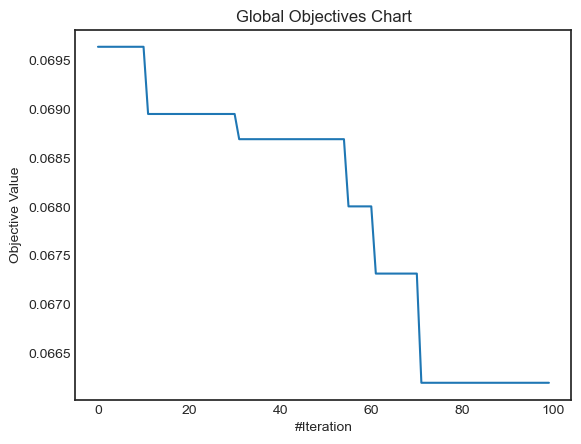

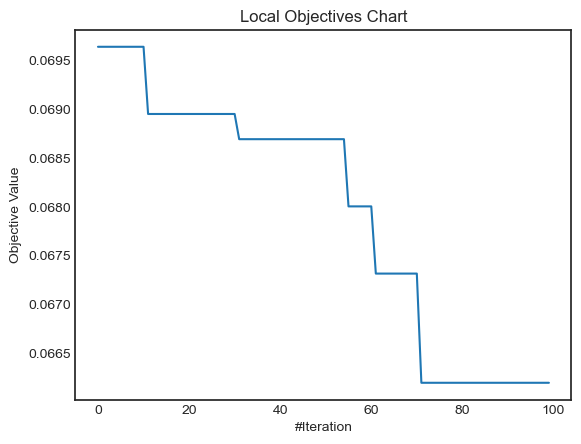

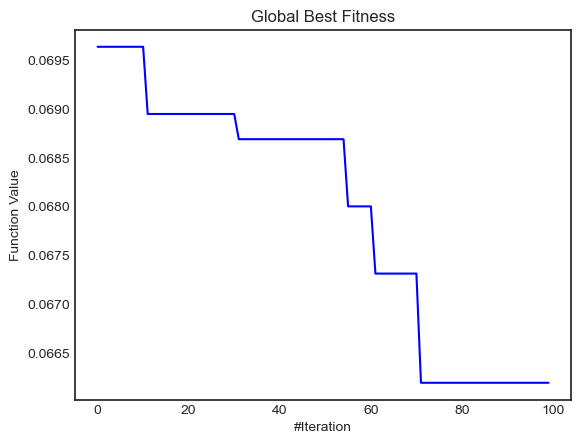

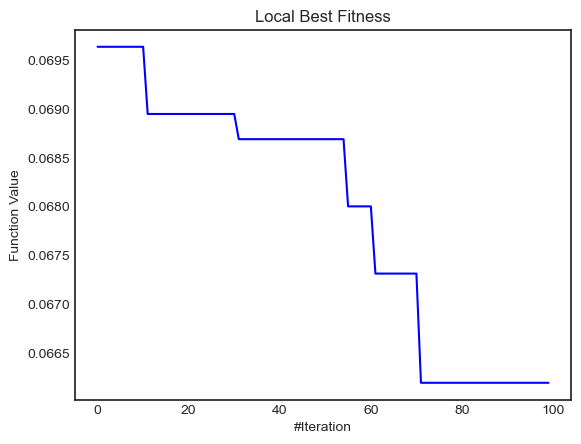

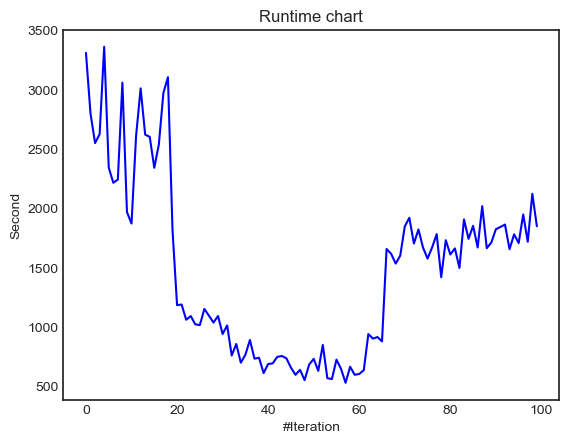

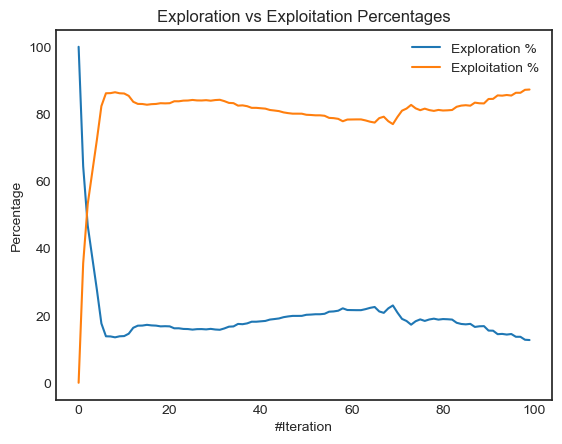

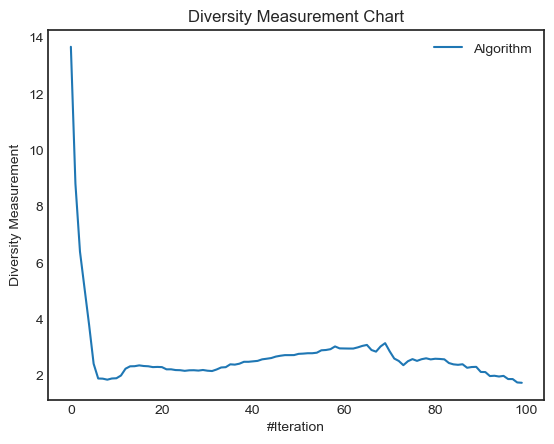

ValueError: Can't draw the trajectory because 'save_population' is set to False or the number of epochs is too small.

In [28]:
## You can access them all via object "history" like this:
md1.history.save_global_objectives_chart(filename="XGB_AO/goc")
md1.history.save_local_objectives_chart(filename="XGB_AO/loc")

md1.history.save_global_best_fitness_chart(filename="XGB_AO/gbfc")
md1.history.save_local_best_fitness_chart(filename="XGB_AO/lbfc")

md1.history.save_runtime_chart(filename="XGB_AO/rtc")

md1.history.save_exploration_exploitation_chart(filename="XGB_AO/eec")

md1.history.save_diversity_chart(filename="XGB_AO/dc")

md1.history.save_trajectory_chart(list_agent_idx=[3, 5], selected_dimensions=[3], filename="XGB_AO/tc")